In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sx = 1000

In [ ]:
class Queens:
    
    def __init__(self, rows):
        self.rows = rows
        self.h = fitness_value(rows)
        self.rowsbin = to_binary(rows)

In [ ]:
def fitness_value(rows):
    value = 0
    for i in range(0,len(rows)) :
        for j in range(i+1,len(rows)) :
            if (rows[i]==rows[j]) or (abs(rows[i]-rows[j]) == abs(i-j)) :
                value += 1

    return value

In [ ]:
a=[1, 4, 7, 5, 2, 0, 6, 3]
fitness_value(a)

1

In [ ]:
def to_binary(rows):
    rows_bin = ''
    for i in range(0,len(rows)) :
        r_bin = "{0:b}".format(int(rows[i]))
        while len(r_bin) < 3 :
            r_bin = '0' + r_bin
        
        rows_bin = rows_bin + r_bin
        
    return rows_bin

In [ ]:
a=[4,0,7,3,1,6,2,5]
to_binary(a)

'100000111011001110010101'

In [ ]:
def to_decimal(rows_bin) :
    
    rows = []
    for i in range(0,len(rows_bin),3):
        temp = rows_bin[i:i+3]
        temp = int(temp, 2)
        rows.append(temp)
        
    return rows

In [ ]:
a='100000111011001110010101'
to_decimal(a)

[4, 0, 7, 3, 1, 6, 2, 5]

In [ ]:
def first_population(size):
    population = []
    for i in range(size):
        row = []
        for j in range(0,8) :
            row.append(random.randint(0 , 7))
            
        population.append(Queens(row))
    
    return population

In [ ]:
a=first_population(2)
print(a[0].rows,"@",a[1].rows)

[6, 7, 3, 7, 2, 3, 0, 7] @ [5, 3, 4, 1, 4, 0, 4, 4]


In [ ]:
def select_parents(population,size):
    
    All_Parent = []
    sort_population = []
    weights = []
    sort_population = sorted(population, key=lambda p: p.h, reverse=True)
    
    for i in range(len(sort_population)):
        weights.append(i+1)
    
    All_Parent = random.choices(sort_population, weights = weights , k = size)
        
    return All_Parent

In [ ]:
def select_parents_computation(population,size):
    
    All_Parent = []
    sort_population = []
    
    for i in range(0,size) :
        temp_population = population.copy()
        random_population = []
        for j in range(0,len(population)//5) :
            index = random.randint(0,len(population)-1-j)
            random_population.append(temp_population[index])
            temp_population.pop(index)
            
        sort_population = sorted(random_population, key=lambda p: p.h, reverse=False)
        All_Parent.append(sort_population[0])
    
        
    return All_Parent

In [ ]:
def cross_over(parents) : 
    childeren = []
    for i in range(0,len(parents)-1) :

#        rowbin_child1 = cross_one_point(parents[i].rowsbin, parents[i+1].rowsbin)
        rowbin_child1 = cross_uniform(parents[i].rowsbin, parents[i+1].rowsbin)
        rowbin_child2 = rowbin_child1[::-1]
        
        row_child1 = to_decimal(rowbin_child1)
        row_child2 = to_decimal(rowbin_child2)
        
        childeren.append(Queens(row_child1))
        childeren.append(Queens(row_child2))
        
        i += 1
        
    return childeren

In [ ]:
def cross_one_point(parent1, parent2) :
    index = random.randint(1,23)
    child = ''

    for i in range(0,len(parent1)) :
        if i < index :
            child = child + parent1[i]
        else :
            child = child + parent2[i]
    
    return child

In [ ]:
cross_one_point('100000111011001110010101','101100111011001010010001')

'100000111011001010010001'

In [ ]:
def cross_uniform(parent1, parent2) :
    child = ''

    for i in range(0,len(parent1)) :
        if random.choice(['1', '2']) == '1' :
            child = child + parent1[i]
        else :
            child = child + parent2[i]
    
    return child

In [ ]:
def mutate(childeren):
    mutatant = childeren
    
    for i in range(0,len(mutatant)) :
        index = random.randint(0,len(mutatant[i].rowsbin)-1)
        if random.random() < 0.2:
            b = random.choice(['0', '1'])
            mutatant[i].rowsbin = mutatant[i].rowsbin[:index] + b + mutatant[i].rowsbin[index+1:]
    
    return mutatant

In [ ]:
def replacement(population, parents, childeren) :
    population_copy = population.copy()
    parents_copy = parents.copy()
    childeren_copy = childeren.copy()
    
    newlistChild = []
    newlistParent = []
    newlistChild = sorted(childeren_copy, key=lambda ch: ch.h, reverse=False)      #STEP 6
    newlistParent = sorted(parents_copy, key=lambda p: p.h, reverse=True)

    for i in range(0,int((len(parents_copy)*30/100)+0.5)) :
        newlistParent[i] = newlistChild[i]
    
    newpopulation = newlistParent
#     sort_pop = sorted(population_copy, key=lambda p: p.h, reverse=True)
    
    for i in range(0,len(newpopulation)) :
        index = random.randint(0,len(population)-1)
        population[index] = newpopulation[i]
        
    return population

In [ ]:
def select(population, size) :
    random_population = []    
    
    temp_population = population.copy()
    random_population = []
    
    for i in range(0,size) :
        index = random.randint(0,len(population)-1-i)
        random_population.append(temp_population[index])
        temp_population.pop(index)
            
        
    return random_population

In [ ]:
def replacement2(population, parents, childeren) :
    population_copy = population.copy()
    parents_copy = parents.copy()
    childeren_copy = childeren.copy()
    
    newlistChild = []
    newlistParent = []
    newpopulation = []

    newlistChild = select(childeren_copy,(len(childeren_copy)*30//100))
    newlistParent = select(parents_copy,(len(parents_copy)*70//100))
    
    for i in range(0,len(newlistParent)) :
        newpopulation.append(newlistParent[i])
    
    for i in range(0,len(newlistChild)) :
        newpopulation.append(newlistChild[i])
        
    for i in range(0,len(newpopulation)) :
        index = random.randint(0,len(population)-1)
        population[index] = newpopulation[i]
        
    return population

In [ ]:
def GetBest(population) :
    pop = sorted(population, key=lambda ch: ch.h, reverse=False)
    k=0
    print("\nposition of Queens :",pop[0].rows,"\n")
    
    rows, cols = (8, 8)
 
    arr = [['_' for i in range(cols)] for j in range(rows)]

    for i in range(0,8) :
        arr[7-pop[0].rows[i]][i] = 'Q'
        
#     for i in range(0,8) :
#         for j in range(0,8) :
#             print(arr[i][j],end="  ")
#         print("\n")

    for row in arr:
        print(row)
        
    return pop[0].h

In [ ]:
def print_pop(population) :
    for i in range(0,len(population)) :
        print(population[i].rows,"  h=",population[i].h)

In [28]:
def main():
    draw_fitness = []    #for draw result
    cnt=0      # for count number of repeat best in generations
    Best=28   # maximum of 8 queen
    gen=0      # for count number of generations
    target=0   # minimum of 8 queen
    
    firstpopulation = first_population(sx)   #STEP 1
    current_population = firstpopulation    #STEP 2
    
    while True :
        parents = select_parents(current_population,sx//4)   #STEP 3
#        parents = select_parents_computation(current_population,sx//4)   #STEP 3

        childeren = cross_over(parents)      #STEP 4

        childeren = mutate(childeren)        #STEP 5
        
        next_population = replacement2(current_population, parents, childeren)  #STEP 6        

        BestNew = GetBest(current_population)      #STEP 7
        
        if Best == BestNew :
            cnt += 1
        elif Best > BestNew :
            cnt=0
            Best = BestNew
        else :
            cnt = 0
        
        print('gen :', gen)
        print("Best (in gen ",gen,") :",Best)
        print("********************")
        draw_fitness.append(Best)
        if Best == target :
            break
            
        current_population = next_population
        gen += 1
    hist = draw_fitness
    plt.plot(hist)


position of Queens : [0, 4, 7, 0, 2, 6, 1, 3] 

['_', '_', 'Q', '_', '_', '_', '_', '_']
['_', '_', '_', '_', '_', 'Q', '_', '_']
['_', '_', '_', '_', '_', '_', '_', '_']
['_', 'Q', '_', '_', '_', '_', '_', '_']
['_', '_', '_', '_', '_', '_', '_', 'Q']
['_', '_', '_', '_', 'Q', '_', '_', '_']
['_', '_', '_', '_', '_', '_', 'Q', '_']
['Q', '_', '_', 'Q', '_', '_', '_', '_']
gen : 0
Best (in gen  0 ) : 1
********************

position of Queens : [0, 4, 7, 0, 2, 6, 1, 3] 

['_', '_', 'Q', '_', '_', '_', '_', '_']
['_', '_', '_', '_', '_', 'Q', '_', '_']
['_', '_', '_', '_', '_', '_', '_', '_']
['_', 'Q', '_', '_', '_', '_', '_', '_']
['_', '_', '_', '_', '_', '_', '_', 'Q']
['_', '_', '_', '_', 'Q', '_', '_', '_']
['_', '_', '_', '_', '_', '_', 'Q', '_']
['Q', '_', '_', 'Q', '_', '_', '_', '_']
gen : 1
Best (in gen  1 ) : 1
********************

position of Queens : [0, 4, 7, 0, 2, 6, 1, 3] 

['_', '_', 'Q', '_', '_', '_', '_', '_']
['_', '_', '_', '_', '_', 'Q', '_', '_']
['_', '_', '_

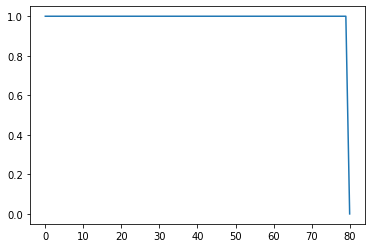

In [29]:
main()